# Gradient Filter

- https://docs.opencv.org/4.1.2/d5/d0f/tutorial_py_gradients.html
- https://docs.opencv.org/4.1.2/da/d22/tutorial_py_canny.html

In simple forms:
$$
    g_x[i,j] = \frac{I[i,j+1] - I[i,j-1]}{2}
$$

$$
    g_y[i,j] = \frac{I[i+1,j] - I[i-1,j]}{2}
$$

With Gaussian Smoothing
$$
    g_x = G' * I(x) \\
    g_y = G' * I(y)
$$
where $G'$ is the gradient of the Gaussian filter $exp(-x^2)$.

In OpenCV, thi is done by `cv.Sobel()`

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [16]:
def cvimshow (im, g=False):
    plt.figure(figsize=(10,10))
    plt.imshow(im[:,:,::-1])
    plt.axis(False)
    
def gimshow (im):
    plt.figure(figsize=(10,10))
    plt.imshow (im, cmap='gray')
    plt.axis(False)

In [17]:
im = cv.imread('sudoku-original.jpg')
im.shape

(423, 419, 3)

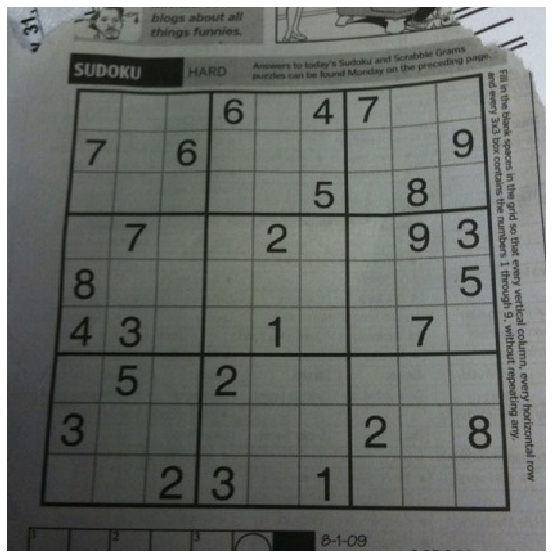

In [18]:
cvimshow (im)

Convert to grayscale

In [19]:
im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

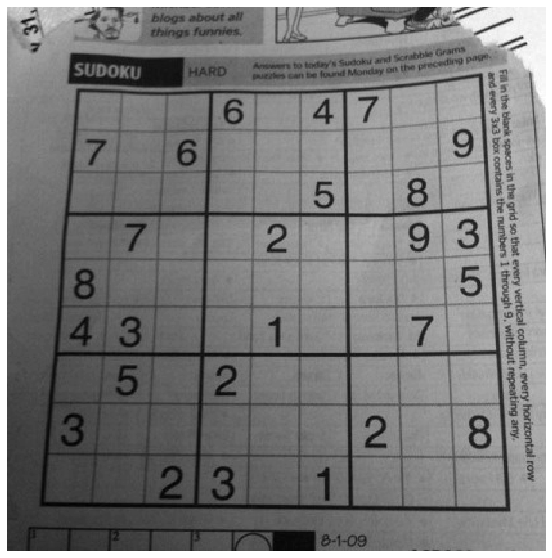

In [20]:
gimshow(im)

Gradient in x-direction

In [21]:
gradx = cv.Sobel (im, cv.CV_32F, 1, 0, ksize=5)

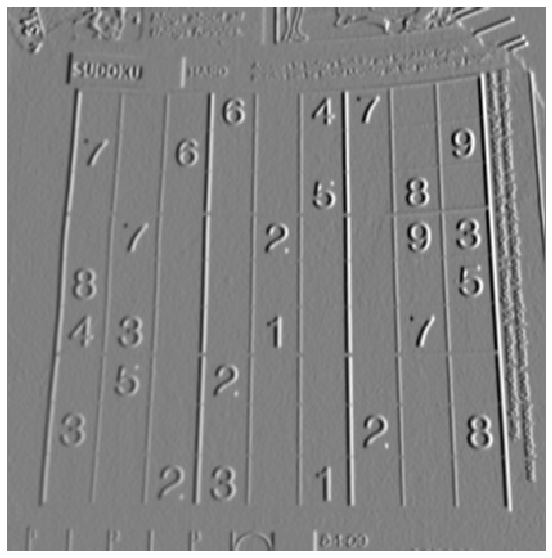

In [22]:
gimshow (gradx)

Gradient operation results in negative values as well as positive.

Text(0.5, 1.0, 'gradient along x at y=128')

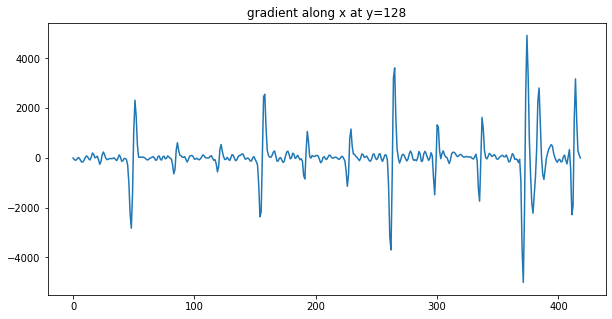

In [29]:
plt.figure (figsize=(10,5))
plt.plot (gradx[128])
plt.title ('gradient along x at y=128')

Absolute value shows the magnitude of the gradient image.

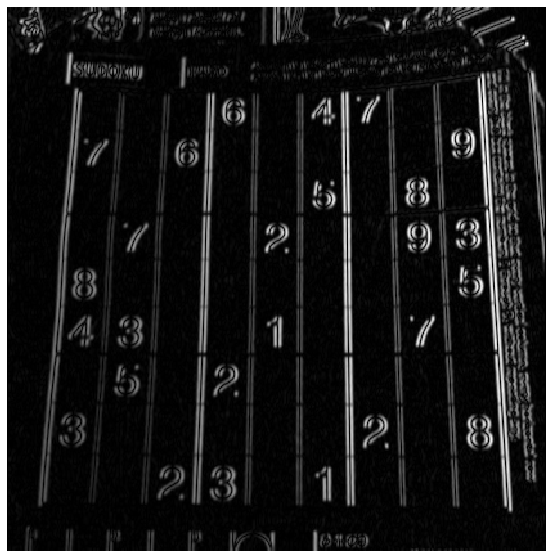

In [27]:
gimshow (np.abs(gradx))

Gradient in y-direction

In [28]:
grady = cv.Sobel (im, cv.CV_32F, 0, 1, ksize=5)

Text(0.5, 1.0, 'gradient along y at x=128')

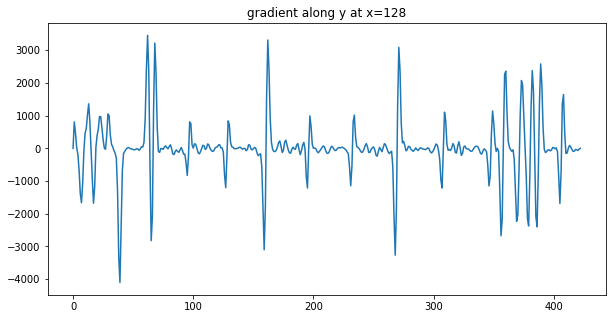

In [30]:
plt.figure (figsize=(10,5))
plt.plot (grady[:,128])
plt.title ('gradient along y at x=128')

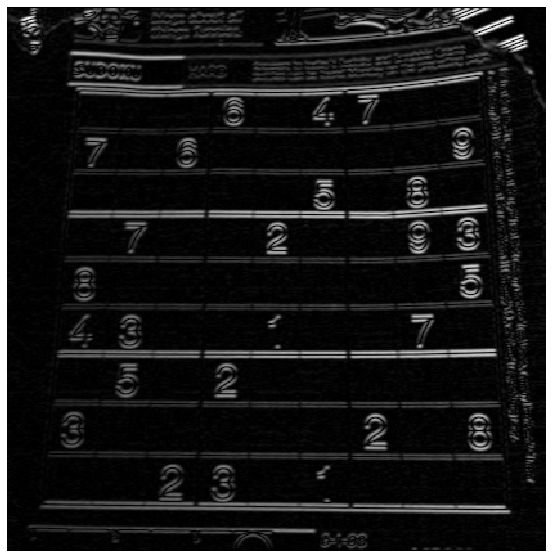

In [31]:
gimshow(np.abs(grady))

Gradient magnitude
- Euclidean 
$$
    M = \sqrt{ g_x^2 + g_y^2 }
$$
- Sum of absolute values 
$$
    M = |g_x^2| + |g_y|
$$


In [32]:
M_l2 = np.sqrt (np.power(gradx, 2) + np.power(grady, 2))

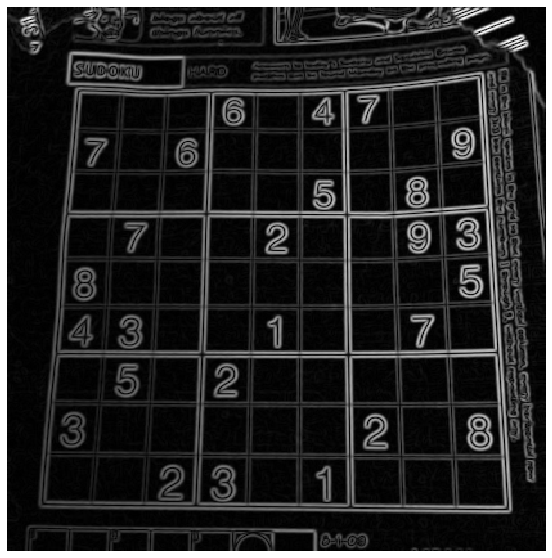

In [33]:
gimshow(M_l2)

In [42]:
input4threshold = np.array(M_l2*255/M_l2.max(),dtype=np.uint8)
# cv.threshold() takes only UINT8 type as input
th, edge_bin = cv.threshold(input4threshold, 0, maxval=1, type=cv.THRESH_BINARY + cv.THRESH_OTSU)

Text(0.5, 1.0, 'binarized with threshold: 57.0')

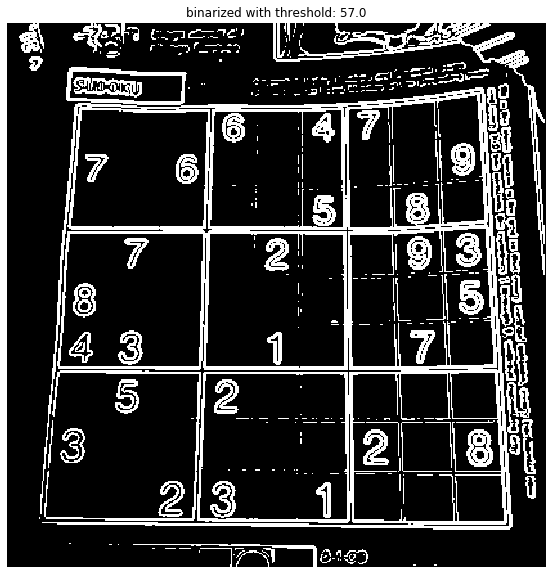

In [43]:
gimshow(edge_bin)
plt.title('binarized with threshold: {}'.format(th))

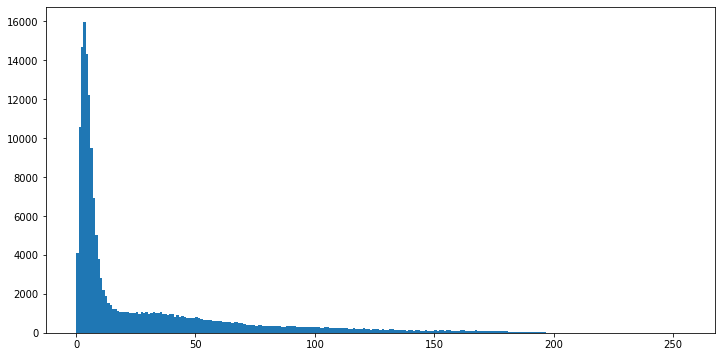

In [51]:
plt.figure(figsize=(12,6))
_ = plt.hist (input4threshold.ravel(), bins=255)

In [44]:
M_l1 = np.abs(gradx) + np.abs(grady)

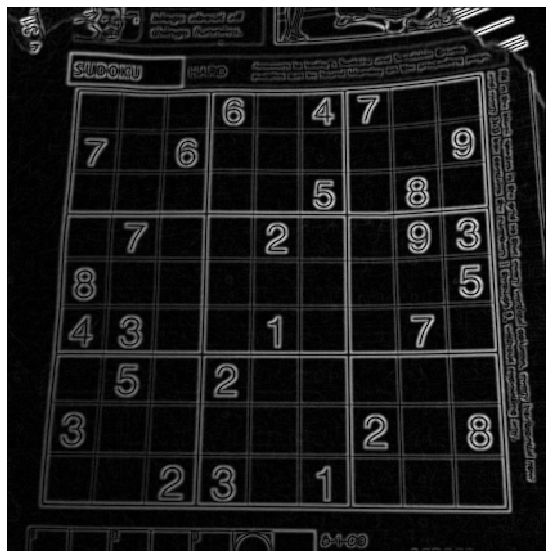

In [45]:
gimshow(M_l1)

# Canny Edge Detector
- One-pixel width edge detection.
- https://docs.opencv.org/4.1.2/d5/d0f/tutorial_py_gradients.html
- The result may change by setting `threshold1` and `threshold2`

In [60]:
canny_edges = cv.Canny(im, threshold1=50, threshold2=300)

In [61]:
canny_edges.shape

(423, 419)

In [70]:
canny_edges.min(), canny_edges.max(), canny_edges.dtype

(0, 255, dtype('uint8'))

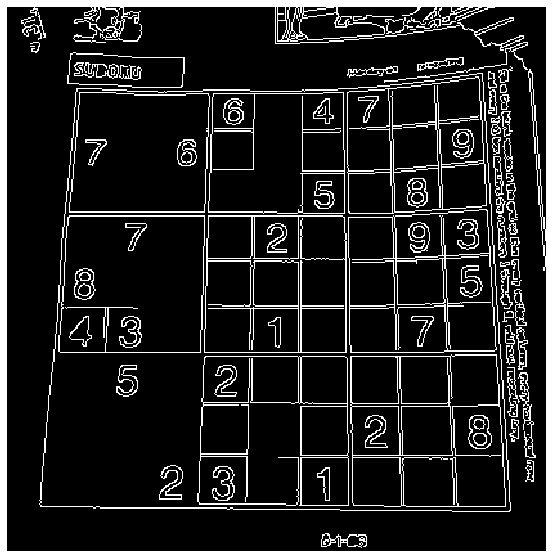

In [63]:
gimshow (canny_edges)

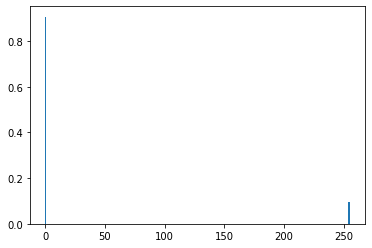

In [66]:
_ = plt.hist(canny_edges.ravel(), bins=255, density=True)

## Canny Edge for RGB Image

In [68]:
imrgb = cv.imread ('nature-500x375.jpg')
canny_edges2 = cv.Canny(imrgb, threshold1=100, threshold2=400)

In [71]:
canny_edges2.min(), canny_edges2.max(), canny_edges2.dtype

(0, 255, dtype('uint8'))

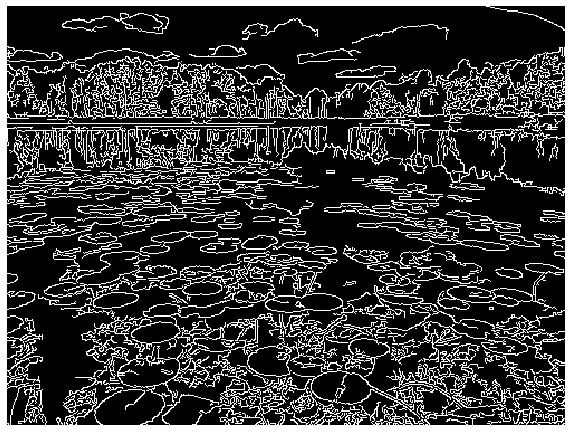

In [72]:
gimshow (canny_edges2)

In [85]:
rgb_canny = np.stack( [cv.bitwise_and (imrgb[:,:,i], canny_edges2) for i in range(3)], axis=2)
rgb_canny.shape

(375, 500, 3)

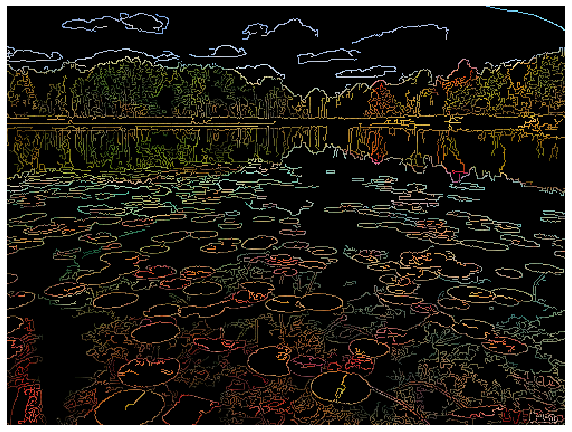

In [86]:
cvimshow(rgb_canny)